In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/catgka/dog.jpeg
/kaggle/input/catgka/cat.jpeg
/kaggle/input/catgka/car.jpeg
/kaggle/input/truckop/101883140-5438832203_da6d83ccd6_o.jpg
/kaggle/input/cifar10-python/cifar-10-python.tar.gz
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-python/cifar-10-batches-py/readme.html


In [33]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [34]:
(x_train, y_train), (x_test, y_test)= cifar10.load_data()

In [35]:
print(x_train.shape)

(50000, 32, 32, 3)


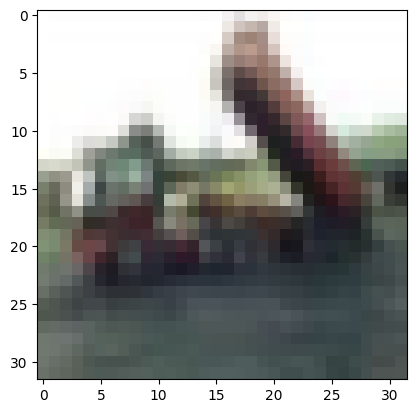

In [36]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])

In [37]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
# x_train = x_train.reshape(-1, 28, 28, 1)
# x_test = x_test.reshape(-1, 28, 28, 1)

In [38]:
print(x_train.shape)

(50000, 32, 32, 3)


In [39]:
print(y_test.shape)

(10000, 1)


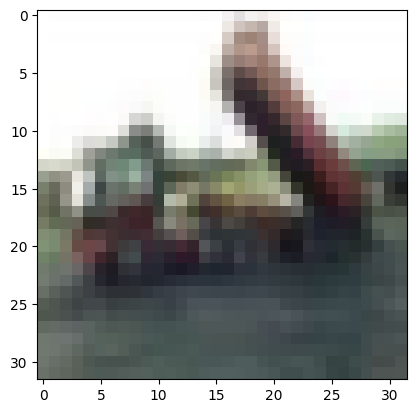

In [40]:
plt.imshow(x_train[2])

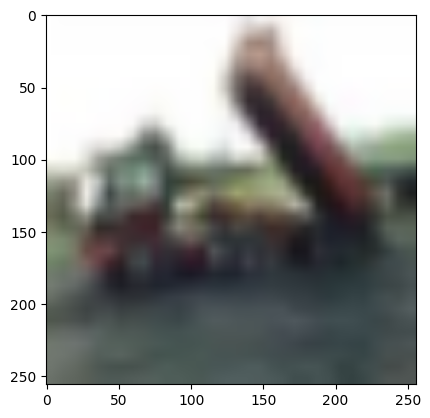

In [41]:
import cv2
# from skimage.filters import unsharp_mask
import matplotlib.pyplot as plt
img = x_train[2]
# img_blur = cv2.GaussianBlur(img, (5,5),0)
# img_sharp = unsharp_mask(img, radius=0, amount=0)
img_resized= cv2.resize(img, (256,256))
# plt.imshow(img_sharp)
plt.imshow(img_resized, vmin=0, vmax=255)
plt.show()

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define the data augmentation pipeline
data_augmentation = ImageDataGenerator(
    rotation_range=15, # Rotate images by up to 15 degrees
    width_shift_range=0.1, # Shift images horizontally by up to 10%
    height_shift_range=0.1, # Shift images vertically by up to 10%
    horizontal_flip=True, # Flip images horizontally
    zoom_range=0.1, # Zoom in and out by up to 10%
)
data_augmentation.fit(x_train)

In [43]:
import keras as k
# labels
num_classes=10
y_train = k.utils.to_categorical(y_train, num_classes)
y_test = k.utils.to_categorical(y_test, num_classes)

In [30]:
print(y_test.shape)

(10000, 10)


In [88]:
from functools import partial
from tensorflow import keras
from tensorflow.keras import layers

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size = 3, padding="same", activation = 'relu')
model1 = tf.keras.Sequential(
    [
        DefaultConv2D(filters=64, kernel_size=3,input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        
        DefaultConv2D(filters=128),
        layers.BatchNormalization(),
        DefaultConv2D(filters=128),
        layers.BatchNormalization(),
        DefaultConv2D(filters=128),
        layers.BatchNormalization(),
        layers.MaxPool2D(),        
        layers.Dropout(0.2),
        
        DefaultConv2D(filters=256),
        layers.BatchNormalization(),
        DefaultConv2D(filters=256),
        layers.BatchNormalization(),
        DefaultConv2D(filters=256),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        layers.Dropout(0.2),
        
        DefaultConv2D(filters=512),
        layers.BatchNormalization(),
        DefaultConv2D(filters=512),
        layers.BatchNormalization(),
        DefaultConv2D(filters=512),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        layers.Dropout(0.2),
        
        layers.Flatten(),
        
        layers.Dense(units=512, activation="relu"),
        layers.Dropout(0.2),
#         layers.Dense(units=256, activation="relu"),
#         layers.Dropout(0.2),
#         layers.Dense(units=128, activation="relu"),
#         layers.Dropout(0.2),
        
        layers.Dense(10, activation="softmax"),
    ]
)

model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



(<keras.layers.core.dense.Dense at 0x77e4fae1ace0>,)

In [89]:
model1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_142 (Conv2D)         (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_74 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_143 (Conv2D)         (None, 32, 32, 128)       73856     
                                                                 
 batch_normalization_75 (Bat  (None, 32, 32, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_144 (Conv2D)         (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_76 (Bat  (None, 32, 32, 128)    

In [90]:
# Train the model with data augmentation using fit_generator
batch_size = 128
epochs = 15
first = model1.fit_generator(
    data_augmentation.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
)

Epoch 1/15


/tmp/ipykernel_32/3722213009.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  first = model1.fit_generator(


390/390 [==============================] - 36s 93ms/step - loss: 1.1547 - accuracy: 0.5987 - val_loss: 2.0006 - val_accuracy: 0.4580
Epoch 2/15
390/390 [==============================] - 37s 94ms/step - loss: 0.9973 - accuracy: 0.6583 - val_loss: 1.1561 - val_accuracy: 0.6297
Epoch 3/15
390/390 [==============================] - 36s 93ms/step - loss: 0.8769 - accuracy: 0.7068 - val_loss: 0.9890 - val_accuracy: 0.6788
Epoch 4/15
390/390 [==============================] - 37s 94ms/step - loss: 0.7856 - accuracy: 0.7416 - val_loss: 0.8150 - val_accuracy: 0.7430
Epoch 5/15
390/390 [==============================] - 37s 94ms/step - loss: 0.7101 - accuracy: 0.7676 - val_loss: 0.7639 - val_accuracy: 0.7489
Epoch 6/15
390/390 [==============================] - 37s 94ms/step - loss: 0.6499 - accuracy: 0.7878 - val_loss: 0.6822 - val_accuracy: 0.7718
Epoch 7/15
390/390 [==============================] - 37s 94ms/step - loss: 0.5985 - accuracy: 0.8067 - val_loss: 0.7886 - val_accuracy: 0.7615
Epo

In [91]:

score1 = model1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score1[0])
print("Test accuracy:", score1[1])

Test loss: 0.40594688057899475
Test accuracy: 0.8744000196456909


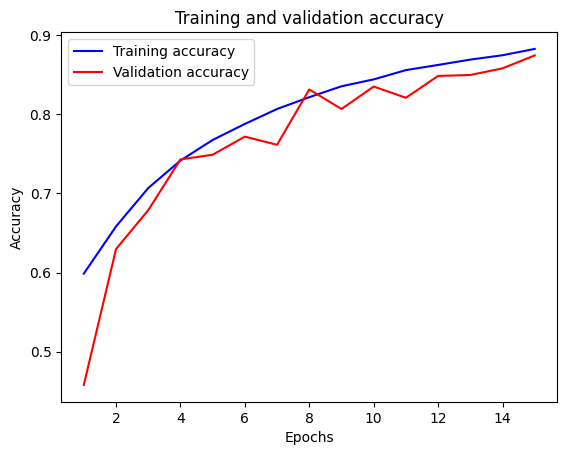

In [92]:
import matplotlib.pyplot as plt

# get the training and validation accuracy from the history object
train_acc = first.history['accuracy']
val_acc = first.history['val_accuracy']

# create a list of epochs
epochs = range(1, len(train_acc) + 1)

# plot the accuracy curves
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


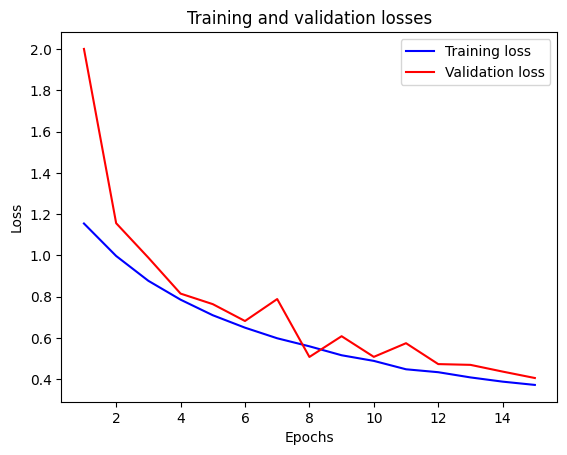

In [93]:
import matplotlib.pyplot as plt

# get the training and validation accuracy from the history object
train_loss = first.history['loss']
val_loss = first.history['val_loss']

# create a list of epochs
epochs = range(1, len(train_acc) + 1)

# plot the accuracy curves
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 [==============================] - 0s 28ms/step
[[2.5039273e-03 9.3789572e-01 4.1487379e-05 1.3419260e-05 5.4844327e-06
  5.5192618e-06 1.2944454e-04 7.4544567e-07 1.9795656e-02 3.9608557e-02]]

Predicted class: automobile


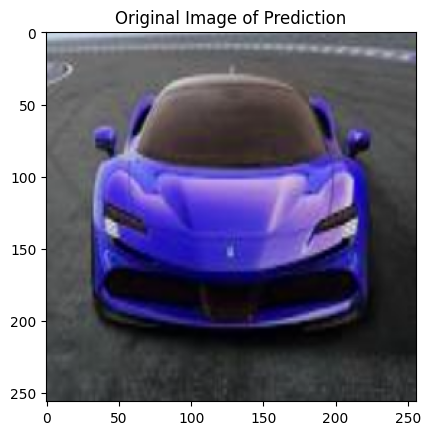

In [109]:
import cv2
# Load an image to predict (replace with your own image)
class_names = ['airplane', 'automobile', 'bird', 'car', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
img_path = '/kaggle/input/catgka/car.jpeg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Preprocess the image for prediction
img = cv2.resize(img, (32, 32))
img = img.astype('float32')/ 255.0
# img = np.expand_dims(img, axis=-1)
img = np.expand_dims(img, axis=0)

# Make a prediction on the image
pred = model1.predict(img)

print(pred)
# Get the predicted class label
class_label = np.argmax(pred[0])

# Get the predicted class name
class_name = class_names[class_label]

# Print the predicted class name
print('\nPredicted class:', class_name)


# Load and display the original image
img = cv2.imread(img_path)
img_resized= cv2.resize(img, (256,256))
plt.imshow(img_resized, vmin=0, vmax=255)
plt.title('Original Image of Prediction')
plt.show()